# ⚒️ Exercices Pandas

## ⚒️  Trouver le nombre d'artistes - dataset : `tracks`
- Obervez de près la colonne `artistes`, que remarquez vous ? Pensez au type d'objet.   
- Nous souhaiterions calculer rapidement le nombre d'artistes par morceau. Quelle méthode peut-on utiliser ?   
- **Tips** : transformez la colonne artistes en chaîne de caractère à l'aide de la fonction ci-dessous, puis créez une colonne avec l'information voulue.

```python   
import re
def split_string(x):
    return re.findall(r"'([^']*)'", x)
```
</br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br>

In [1]:
# Votre code
...

In [2]:
#solution
import pandas as pd
tracks = pd.read_csv('../../../../3_datasets/tracks.csv')
display(tracks.artists.tail(2))
#Investigation
print(f"Hmmm, le type d'object de la colonne artiste n'est pas une liste sur laquelle on pourrait calculer facilement la taille et donc le nombre d'artistes. \nEn fait, c'est un type {type(tracks.loc[0, 'artists'])}, qu'il va falloir convertir !")

586670    ['Gentle Bones', 'Clara Benin']
586671                      ['Afrosound']
Name: artists, dtype: object

Hmmm, le type d'object de la colonne artiste n'est pas une liste sur laquelle on pourrait calculer facilement la taille et donc le nombre d'artistes. 
En fait, c'est un type <class 'str'>, qu'il va falloir convertir !


In [3]:
#solution
import re
def split_string(x):
    return re.findall(r"'([^']*)'", x) #on cherche tout ce qu'il y a à l'intérieur des quotes

#Créer une nouvelle colonne avec la transformation voulue
X_new = tracks.copy()
X_new['artist_transf'] = X_new.artists.apply(split_string).copy()
X_new

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_transf
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,[Uli]
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,[Fernando Pessoa]
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,[Ignacio Corsini]
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,[Ignacio Corsini]
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,[Dick Haymes]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,[阿YueYue]
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,[ROLE MODEL]
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,[FINNEAS]
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,"[Gentle Bones, Clara Benin]"


In [4]:
#solution
#Créer une colonne num_artistes
X_new["num_artistes"] = X_new.artist_transf.apply(len)
X_new.sort_values(by ='num_artistes', ascending=False, inplace = True)

## ⚒️ Consommation d'Alcool

1. Importer le fichier `alcohol.csv` dans pandas.
2. Observer les colonnes et variables du tableau. Comment les interpréter ?
3. Quel pays consomme le plus d'alcool (top5) ? Est-ce cohérent ?
4. Quel continent consomme le plus de bière en moyenne ?
5. Afficher les statistiques de consommation de vin par continent.
6. Créér une colonne `preferred_drink` par pays qui donne l'alcool le plus consommé en moyenne dans ce pays.

In [5]:
# Votre code
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
...

Ellipsis

In [6]:
#solution
#1. Importer le fichier `alcohol.csv` dans pandas.
import pandas as pd
X = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
X.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [7]:
#solution
# 2. Observer les colonnes et variables du tableau. Comment les interpréter ?
X.info()
X.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [8]:
#solution
# 3. Quel pays consomme le plus d'alcool (top5) ?
X.sort_values("total_litres_of_pure_alcohol", ascending=False)[:5]
# X.nlargest(5, ["total_litres_of_pure_alcohol", "wine_servings"])

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,EU
98,Lithuania,343,244,56,12.9,EU
3,Andorra,245,138,312,12.4,EU
68,Grenada,199,438,28,11.9,NaN
45,Czech Republic,361,170,134,11.8,EU


In [9]:
#solution
# 4. Quel continent consomme le plus de bière en moyenne ?
X.groupby("continent")[["beer_servings"]].mean().sort_values(by='beer_servings', ascending=False)

,beer_servings
continent,
EU,193.777778
SA,175.083333
OC,89.687500
AF,61.471698
AS,37.045455


In [10]:
#solution
# 5. Afficher les statistiques de consommation de vin par continent.
X.groupby("continent")[["wine_servings"]].describe()

wine_servings                                                   \
                  count        mean        std  min   25%    50%     75%   
continent                                                                  
AF                 53.0   16.264151  38.846419  0.0   1.0    2.0   13.00   
AS                 44.0    9.068182  21.667034  0.0   0.0    1.0    8.00   
EU                 45.0  142.222222  97.421738  0.0  59.0  128.0  195.00   
OC                 16.0   35.625000  64.555790  0.0   1.0    8.5   23.25   
SA                 12.0   62.416667  88.620189  1.0   3.0   12.0   98.50   

                  
             max  
continent         
AF         233.0  
AS         123.0  
EU         370.0  
OC         212.0  
SA         221.0

In [11]:
#solution
# 6.Créér une colonne preferred_drink par pays qui donne l'alcool le plus consommé en moyenne dans ce pays


# def favorite_alcohol(x):
#     beer, spirit, wine = x[1:4]
#     preferred = max(x[1:4])
#     if preferred == 0:
#         return "None"
#     elif beer == preferred:
#         return "Beer"
#     elif spirit == preferred:
#         return "Spirit"
#     else:
#         return "Wine"
#     print(b, s, w)

# X["preferred_alcohol"] = X.apply(favorite_alcohol, axis=1)

X["preferred_alcohol"] = X[["beer_servings", "spirit_servings", "wine_servings"]].idxmax(axis=1)
X.loc[X.iloc[:, 1:3].sum(axis=1) == 0, "preferred_alcohol"] = "None"
X

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,preferred_alcohol
0,Afghanistan,0,0,0,0.0,AS,None
1,Albania,89,132,54,4.9,EU,spirit_servings
2,Algeria,25,0,14,0.7,AF,beer_servings
3,Andorra,245,138,312,12.4,EU,wine_servings
4,Angola,217,57,45,5.9,AF,beer_servings
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,beer_servings
189,Vietnam,111,2,1,2.0,AS,beer_servings
190,Yemen,6,0,0,0.1,AS,beer_servings
191,Zambia,32,19,4,2.5,AF,beer_servings


In [12]:
X["preferred_drink"] = list(X.iloc[:,1:5].idxmax(axis=1))

for ligne in range(len(X)):
    if X.loc[ligne,"beer_servings"] == X.loc[ligne,"spirit_servings"] & X.loc[ligne,"beer_servings"] == X.loc[ligne,"wine_servings"]:
        X.loc[ligne,"preferred_drink"] = "Pas de préférence"

X[X["preferred_drink"] == "Pas de préférence"]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,preferred_alcohol,preferred_drink
0,Afghanistan,0,0,0,0.0,AS,None,Pas de préférence
13,Bangladesh,0,0,0,0.0,AS,None,Pas de préférence
38,Comoros,1,3,1,0.1,AF,spirit_servings,Pas de préférence
46,North Korea,0,0,0,0.0,AS,None,Pas de préférence
79,Iran,0,0,0,0.0,AS,None,Pas de préférence
90,Kuwait,0,0,0,0.0,AS,None,Pas de préférence
97,Libya,0,0,0,0.0,AF,None,Pas de préférence
103,Maldives,0,0,0,0.0,AS,None,Pas de préférence
106,Marshall Islands,0,0,0,0.0,OC,None,Pas de préférence
107,Mauritania,0,0,0,0.0,AF,None,Pas de préférence


In [13]:
ligne = 38
X.loc[ligne,"beer_servings"] == X.loc[ligne,"spirit_servings"] & X.loc[ligne,"beer_servings"] == X.loc[ligne,"wine_servings"]

True

In [14]:
X[X['country']== 'Comoros'].dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
preferred_alcohol                object
preferred_drink                  object
dtype: object

## ⚒️ Join training

**Ojectif : on cherche à obtenir un df de tracks : 1 ligne = 1 track  avec un de ses artistes, le nom de l'artiste, le groupe, , les followers de l'artiste à partir des tables `tracks` avec une table `artists`(résultat attendu ci-dessous).**
- 1. Charger la table artists et tracks et explorer l'information dont vous avez besoin.
- 2. Remplacer la colonne 'id_artists' de tracks par une version découpée (vous avez vu une méthode dans le cours qui peut vous aider)
- 3. Utiliser la méthode explode sur la colonne `id_artists` pour obtenir une ligne par artiste
- 4. Utiliser la méthode join adapté pour fusionner les deux tables et nettoyer la table


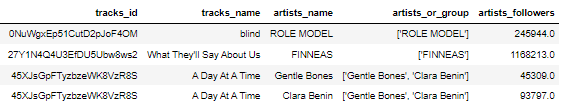

In [15]:
# Rappel split_string()
import pandas as pd
import re
def split_string(x):
    return re.findall(r"'([^']*)'", x)

In [16]:
# Votre code
...

In [17]:
#solution
# 1. Charger la table artists et tracks et explorer l'information dont vous avez besoin.
tracks = pd.read_csv('../../../../3_datasets/tracks.csv')
artists = pd.read_csv("../../../../3_datasets/artists.csv")

display(tracks.shape, tracks.columns) #on a besoin de id_artists (pour ramener des infos sur l'artiste), artists (pour le groupe entier qui jour le morceau)
artists.shape, artists.columns #on a besoin de son nom et des ses foloowers

(586672, 20)

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

((1162095, 5),
 Index(['id', 'followers', 'genres', 'name', 'popularity'], dtype='object'))

In [18]:
#solution
# 1bis. Nettoyer les tables initiales avec uniquement les informations requises ; renommer les colonnes pour éviter les confusions
tracks_short = tracks[['id','name','id_artists', 'artists']].copy()
tracks_short.columns = ['tracks_id','tracks_name','artists_id', 'artists_or_group']
artists_short = artists[['id','followers', 'name']].copy()
artists_short.columns = ['artists_id','artists_followers', 'artists_name']
display(tracks_short.tail(5))
artists_short.tail(5)

,tracks_id,tracks_name,artists_id,artists_or_group
586667,5rgu12WBIHQtvej2MdHSH0,云与海,['1QLBXKM5GCpyQQSVMNZqrZ'],['阿YueYue']
586668,0NuWgxEp51CutD2pJoF4OM,blind,['1dy5WNgIKQU6ezkpZs4y8z'],['ROLE MODEL']
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,['37M5pPGs6V1fchFJSgCguX'],['FINNEAS']
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,"['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...","['Gentle Bones', 'Clara Benin']"
586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,['0i4Qda0k4nf7jnNHmSNpYv'],['Afrosound']


,artists_id,artists_followers,artists_name
1162090,3cOzi726Iav1toV2LRVEjp,4831.0,Ali Siddiq
1162091,6LogY6VMM3jgAE6fPzXeMl,46.0,Rodney Laney
1162092,19boQkDEIay9GaVAWkUhTa,257.0,Blake Wexler
1162093,5nvjpU3Y7L6Hpe54QuvDjy,2357.0,Donnell Rawlings
1162094,2bP2cNhNBdKXHC6AnqgyVp,40.0,Gabe Kea


In [19]:
#solution
# 2. Remplacer la colonne 'id_artists' de tracks par une version découpée (vous avez vu une méthode dans le cours qui peut vous aider)
tracks_short['artists_id_clean'] = tracks_short['artists_id'].apply(split_string)
display(tracks_short.tail(5))
type(tracks_short.loc[0,'artists_id']), type(tracks_short.loc[0,'artists_id_clean'])

,tracks_id,tracks_name,artists_id,artists_or_group,artists_id_clean
586667,5rgu12WBIHQtvej2MdHSH0,云与海,['1QLBXKM5GCpyQQSVMNZqrZ'],['阿YueYue'],[1QLBXKM5GCpyQQSVMNZqrZ]
586668,0NuWgxEp51CutD2pJoF4OM,blind,['1dy5WNgIKQU6ezkpZs4y8z'],['ROLE MODEL'],[1dy5WNgIKQU6ezkpZs4y8z]
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,['37M5pPGs6V1fchFJSgCguX'],['FINNEAS'],[37M5pPGs6V1fchFJSgCguX]
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,"['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...","['Gentle Bones', 'Clara Benin']","[4jGPdu95icCKVF31CcFKbS, 5ebPSE9YI5aLeZ1Z2gkqjn]"
586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,['0i4Qda0k4nf7jnNHmSNpYv'],['Afrosound'],[0i4Qda0k4nf7jnNHmSNpYv]


(str, list)

In [20]:
#solution
# 3. Utiliser la méthode explode sur la colonne `id_artists` pour obtenir une ligne par artiste
tracks_short.drop(columns='artists_id', inplace=True) #on nettoie cette colonne
tracks_short.rename({'artists_id_clean':'artists_id'}, axis=1, inplace=True)

display(tracks_short.shape) # shape initiale
tracks_exploded = tracks_short.explode('artists_id')
display(tracks_exploded.shape) # shape après explode
tracks_exploded.tail(5) #exemple artits ['Gentle Bones', 'Clara Benin'] eplosé

(586672, 4)

(757170, 4)

,tracks_id,tracks_name,artists_or_group,artists_id
586668,0NuWgxEp51CutD2pJoF4OM,blind,['ROLE MODEL'],1dy5WNgIKQU6ezkpZs4y8z
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,['FINNEAS'],37M5pPGs6V1fchFJSgCguX
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,"['Gentle Bones', 'Clara Benin']",4jGPdu95icCKVF31CcFKbS
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,"['Gentle Bones', 'Clara Benin']",5ebPSE9YI5aLeZ1Z2gkqjn
586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,['Afrosound'],0i4Qda0k4nf7jnNHmSNpYv


In [21]:
#solution
#4. Utiliser la méthode join adapté pour fusionner les deux tables et nettoyer la table
df_final = pd.merge(tracks_exploded, artists_short, how ='left', on='artists_id')
df_final_clean = df_final[['tracks_id', 'tracks_name', 'artists_name','artists_or_group', 'artists_followers']].reset_index(drop=True)
df_final_clean.tail(5)

,tracks_id,tracks_name,artists_name,artists_or_group,artists_followers
757165,0NuWgxEp51CutD2pJoF4OM,blind,ROLE MODEL,['ROLE MODEL'],245944.0
757166,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,FINNEAS,['FINNEAS'],1168213.0
757167,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,Gentle Bones,"['Gentle Bones', 'Clara Benin']",45309.0
757168,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,Clara Benin,"['Gentle Bones', 'Clara Benin']",93797.0
757169,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,Afrosound,['Afrosound'],19634.0


##  ⚒️ Commandes Chipotle

1. Importer le fichier `chipotle.tsv` dans pandas.
2. Interpréter et potentiellment nettoyer les données du tableau.
3. Combien de produits coûtent plus de $10 par unité ?
4. Lister le prix moyen de chaque item (soyez prudent)
5. Afficher la commande la plus chère.
6. Combien de fois le 'veggie bowl' a-t-il été commandé ?
7. Combien de fois quelqu'un a-t-il commandé plus d'un soda ?

In [22]:
# Votre code
...

In [23]:
#solution
import pandas as pd
# 1. Importer le fichier chipotle.tsv dans pandas
X = pd.read_csv("../../../../3_datasets/chipotle.tsv", delimiter="\t")
X.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [24]:
#solution
# 2. Interpréter et potentiellment nettoyer les données du tableau.
display(X.info()) #object for item_price, let's convert it !
X.item_price = pd.to_numeric(X.item_price.str.replace("$", "", regex=False))
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [25]:
X[X['item_name'] == 'Carnitas Bowl']

,order_id,quantity,item_name,choice_description,item_price
33,17,1,Carnitas Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",8.99
97,43,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.75
145,65,1,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Rice, Fajita Veget...",9.25
163,74,1,Carnitas Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",11.48
399,173,1,Carnitas Bowl,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
...,...,...,...,...,...
4500,1789,1,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",9.25
4504,1791,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Rice, Sour Cream, Guacam...",11.75
4562,1814,1,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",9.25
4593,1825,1,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Rice, Sour Cream, ...",11.75


In [26]:
#solution
# 3. Combien de produits coûtent plus de $10 par unité ?
X.query('quantity == 2 & item_price >= 9.95').drop_duplicates(["item_name", "choice_description"]).sort_values("item_price", ascending=True)

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
3823,1533,2,Chicken Burrito,"[[Lettuce, Rice]]",16.38
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
3133,1249,2,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",16.98
577,237,2,Chicken Soft Tacos,"[Fresh Tomato Salsa (Mild), [Pinto Beans, Rice...",16.98
...,...,...,...,...,...
1566,635,2,Steak Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",23.50
4427,1764,2,Steak Bowl,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Sour ...",23.50
506,212,2,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",23.50
281,123,2,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Black Beans, Chee...",23.78


In [27]:
#solution
# 4. Lister le prix moyen de chaque produit
#Calculating the good unit price
price = X.groupby("item_name")[["item_price"]].sum().reset_index()
quantity = X.groupby("item_name")[["quantity"]].sum().reset_index()

df = pd.merge(price, quantity, how='inner', on="item_name")
df['unit_price_true'] = df.item_price/df.quantity

In [28]:
price

,item_name,item_price
0,6 Pack Soft Drink,356.95
1,Barbacoa Bowl,672.36
2,Barbacoa Burrito,894.75
3,Barbacoa Crispy Tacos,120.21
4,Barbacoa Salad Bowl,106.40
5,Barbacoa Soft Tacos,250.46
6,Bottled Water,302.56
7,Bowl,29.60
8,Burrito,44.40
9,Canned Soda,137.34


In [29]:
X["unit_price"] = X["item_price"] / X["quantity"]

df = X.groupby("item_name")[["unit_price"]].mean().sort_values(by='unit_price', ascending=False)
df

,unit_price
item_name,
Carnitas Salad Bowl,11.056667
Steak Salad Bowl,11.027931
Barbacoa Salad Bowl,10.640000
Carnitas Bowl,10.315588
Steak Bowl,10.232559
Barbacoa Bowl,10.187273
Veggie Salad Bowl,10.138889
Barbacoa Crispy Tacos,10.087273
Barbacoa Soft Tacos,10.018400


In [30]:
#solution
# 4. Lister le prix moyen de chaque produit
#Calculating the good unit price
price = X.groupby("item_name")[["item_price"]].sum().reset_index()
quantity = X.groupby("item_name")[["quantity"]].sum().reset_index()

df = pd.merge(price, quantity, how='inner', on="item_name")
df['unit_price_true'] = df.item_price/df.quantity

#Making the common error with averge unit price
X["unit_price"] = X["item_price"] / X["quantity"]
df_false = X.groupby("item_name")[["unit_price"]].mean().sort_values(by='unit_price', ascending=False)

df_concat = pd.merge(df, df_false, how='inner', on='item_name')
df_concat.columns = ['item_name', 'item_price', 'quantity', 'unit_price_true', 'unit_price_false']
print("Average unit price true vs false method 👇")
df_concat.sort_values(by='unit_price_true', ascending=False)

Average unit price true vs false method 👇


,item_name,item_price,quantity,unit_price_true,unit_price_false
42,Steak Salad Bowl,343.59,31,11.083548,11.027931
15,Carnitas Salad Bowl,66.34,6,11.056667,11.056667
4,Barbacoa Salad Bowl,106.40,10,10.640000,10.640000
11,Carnitas Bowl,736.71,71,10.376197,10.315588
38,Steak Bowl,2260.19,221,10.227104,10.232559
1,Barbacoa Bowl,672.36,66,10.187273,10.187273
48,Veggie Salad Bowl,182.50,18,10.138889,10.138889
5,Barbacoa Soft Tacos,250.46,25,10.018400,10.018400
3,Barbacoa Crispy Tacos,120.21,12,10.017500,10.087273
21,Chicken Salad Bowl,1228.75,123,9.989837,9.909091


In [31]:
#solution
# 4. NB : it works if you have only 1 as a quantity for each row(total qunatity = nb of row) or only one row 
X[X['item_name']=='Carnitas Salad Bowl']

,order_id,quantity,item_name,choice_description,item_price,unit_price
1132,468,1,Carnitas Salad Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",11.89,11.89
1865,756,1,Carnitas Salad Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",9.39,9.39
2610,1035,1,Carnitas Salad Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.89,11.89
3115,1243,1,Carnitas Salad Bowl,"[Tomatillo Green Chili Salsa, [Rice, Pinto Bea...",9.39,9.39
3749,1499,1,Carnitas Salad Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.89,11.89
4239,1692,1,Carnitas Salad Bowl,"[Tomatillo Green Chili Salsa, [Black Beans, Ch...",11.89,11.89


In [32]:
#solution
# 5. Afficher la commande la plus chère.
display(X.groupby("order_id")["item_price"].sum().sort_values(ascending=False))
X.query('order_id == 926')

order_id
926     205.25
1443    160.74
1483    139.00
691     118.25
1786    114.30
         ...  
17       10.08
889      10.08
1014     10.08
1303     10.08
1602     10.08
Name: item_price, Length: 1834, dtype: float64

,order_id,quantity,item_name,choice_description,item_price,unit_price
2304,926,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Lettuce]]",9.25,9.25
2305,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75,8.75
2306,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75,8.75
2307,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75,8.75
2308,926,1,Steak Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Lettu...",9.25,9.25
2309,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75,8.75
2310,926,1,Steak Burrito,"[Roasted Chili Corn Salsa, [Rice, Cheese, Sour...",9.25,9.25
2311,926,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75,8.75
2312,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce]]",8.75,8.75
2313,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream...",8.75,8.75


In [33]:
#solution
# 6. Combien de fois le 'veggie bowl' a-t-il été commandé ?
X.query("item_name == 'Veggie Bowl'").quantity.sum()

87

In [34]:
#solution
# 7. Combien de fois quelqu'un a-t-il commandé plus d'un soda ?
X.query("item_name == 'Canned Soda' & quantity > 1")

,order_id,quantity,item_name,choice_description,item_price,unit_price
18,9,2,Canned Soda,[Sprite],2.18,1.09
51,23,2,Canned Soda,[Mountain Dew],2.18,1.09
162,73,2,Canned Soda,[Diet Coke],2.18,1.09
171,76,2,Canned Soda,[Diet Dr. Pepper],2.18,1.09
350,150,2,Canned Soda,[Diet Coke],2.18,1.09
352,151,2,Canned Soda,[Coca Cola],2.18,1.09
698,287,2,Canned Soda,[Coca Cola],2.18,1.09
700,288,2,Canned Soda,[Coca Cola],2.18,1.09
909,376,2,Canned Soda,[Mountain Dew],2.18,1.09
1091,450,2,Canned Soda,[Dr. Pepper],2.18,1.09


In [35]:
X[X.item_name == 'Veggie Bowl'].sort_values('quantity')

,order_id,quantity,item_name,choice_description,item_price,unit_price
62,28,1,Veggie Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
3082,1228,1,Veggie Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.25,11.25
2939,1168,1,Veggie Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
2903,1155,1,Veggie Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",11.25,11.25
2803,1113,1,Veggie Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
...,...,...,...,...,...,...
936,386,1,Veggie Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Pinto Beans...",8.49,8.49
901,373,1,Veggie Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25,11.25
4468,1780,1,Veggie Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
3617,1449,2,Veggie Bowl,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",16.98,8.49


In [36]:
#value_count
X.item_name.value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

## ⚒️ Films IMDB

1. Importer le fichier `movies.csv` dans pandas.
2. Interpréter et potentiellment nettoyer les données du tableau.
3. Quel est le film le plus long ? Quelle est la durée moyenne d'un film par genre ?
4. Compter le nombre de film par catégorie de rating.
5. Déterminer le film le mieux noté par catégorie.
6. Lister les films ayant le même titre.
7. Lister le nombre de fois où chaque acteur apparaît dans un film. Quels sont les 10 acteurs apparaissant le plus souvent ?

In [37]:
# Votre code
...

In [38]:
#solution
# 1. Importer le fichier `movies.csv` dans pandas.
X = pd.read_csv("../../../../3_datasets/movies.csv")
X.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [39]:
#solution
# 2. Interpréter et potentiellment nettoyer les données du tableau.
display(X.isna().sum())
X.dropna(inplace=True)
X.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

In [40]:
#solution
# 3. Quel est le film le plus long ? Quelle est la durée moyenne d'un film par genre ?
display(X.sort_values("duration", ascending=False)[0:5]) #top 5
X.groupby("genre")[['duration']].mean().sort_values(by='duration', ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."


,duration
genre,
Western,136.666667
Adventure,134.932432
Biography,132.131579
Drama,126.539568
Action,126.251852
Crime,122.298387
Mystery,115.625000
Thriller,114.200000
Fantasy,112.000000


In [41]:
#solution
# 4. Compter le nombre de film par catégorie de rating (go see the doc)

# G - For all audiences
# PG - Parental Guidance Suggested (mainly for under 10's)
# PG-13 - Parental Guidance Suggested for children under 13
# R - Under 17 not admitted without parent or guardian
# NC-17 - Under 17 not admitted
# Approved - Pre-1968 titles only (from the MPA site) Under the Hays Code, films were simply approved or disapproved based on whether they were deemed 'moral' or 'immoral'.)


display(X.content_rating.unique())
X.content_rating.replace(["NOT RATED", "PASSED", "GP"], "UNRATED", inplace=True)
# X.content_rating = X.content_rating.fillna("UNRATED") #if you do not remove the NA before

display(X.content_rating.unique())
X.groupby('content_rating')[['title']].count().sort_values(by='title', ascending=False)

array(['R', 'PG-13', 'NOT RATED', 'PG', 'UNRATED', 'APPROVED', 'PASSED',
       'G', 'X', 'TV-MA', 'GP', 'NC-17'], dtype=object)

array(['R', 'PG-13', 'UNRATED', 'PG', 'APPROVED', 'G', 'X', 'TV-MA',
       'NC-17'], dtype=object)

,title
content_rating,
R,460
PG-13,189
PG,123
UNRATED,113
APPROVED,47
G,32
NC-17,7
X,4
TV-MA,1


In [42]:
#solution
# 5. Déterminer le film le mieux noté par catégorie

#option1
display(X.sort_values("star_rating", ascending=False).groupby("genre")[['star_rating', "title"]].first())

#option2
X.groupby('genre').agg(
    BestRatedMovie=pd.NamedAgg(column='title', aggfunc='first'),
    MaxRating=pd.NamedAgg(column='star_rating', aggfunc='max')
).reset_index()

,star_rating,title
genre,,
Action,9.0,The Dark Knight
Adventure,8.9,The Lord of the Rings: The Return of the King
Animation,8.6,Spirited Away
Biography,8.9,Schindler's List
Comedy,8.6,Modern Times
Crime,9.3,The Shawshank Redemption
Drama,8.9,12 Angry Men
Family,7.9,E.T. the Extra-Terrestrial
Fantasy,7.7,The City of Lost Children


,genre,BestRatedMovie,MaxRating
0,Action,The Dark Knight,9.0
1,Adventure,The Lord of the Rings: The Return of the King,8.9
2,Animation,Spirited Away,8.6
3,Biography,Schindler's List,8.9
4,Comedy,Life Is Beautiful,8.6
5,Crime,The Shawshank Redemption,9.3
6,Drama,12 Angry Men,8.9
7,Family,E.T. the Extra-Terrestrial,7.9
8,Fantasy,The City of Lost Children,7.7
9,Film-Noir,The Third Man,8.3


In [43]:
#solution
# 6. Lister les films ayant le même titre.
X.title.value_counts()

Dracula                            2
Les Miserables                     2
The Girl with the Dragon Tattoo    2
The Shawshank Redemption           1
Dangerous Liaisons                 1
                                  ..
In the Heat of the Night           1
Nosferatu                          1
Black Swan                         1
Ratatouille                        1
Wall Street                        1
Name: title, Length: 973, dtype: int64

In [44]:
#solution
# 7. Lister le nombre de fois où chaque acteur apparaît dans un film. Quels sont les 10 acteurs apparaissant le plus souvent ?
# Solution 1: Manuelle avec un apply
def repp(string):
    return string.replace("[","").replace("]","").replace("u'","").replace("',",",")[:-1]

actors_list = []
for movie_actors in X['actors_list'].apply(repp):
    actors_list.append([e.strip() for e in movie_actors.split(',')])
    
actor_dict = {}
for actor in actors_list:
    for a in actor:
        if a in actor_dict:
            actor_dict[a] +=1
        else:
            actor_dict[a] = 1

actor_dict

{'Tim Robbins': 5,
 'Morgan Freeman': 8,
 'Bob Gunton': 1,
 'Marlon Brando': 4,
 'Al Pacino': 13,
 'James Caan': 2,
 'Robert De Niro': 18,
 'Robert Duvall': 7,
 'Christian Bale': 11,
 'Heath Ledger': 2,
 'Aaron Eckhart': 2,
 'John Travolta': 1,
 'Uma Thurman': 5,
 'Samuel L. Jackson': 6,
 'Henry Fonda': 3,
 'Lee J. Cobb': 2,
 'Martin Balsam': 1,
 'Clint Eastwood': 13,
 'Eli Wallach': 1,
 'Lee Van Cleef': 2,
 'Elijah Wood': 5,
 'Viggo Mortensen': 4,
 'Ian McKellen': 8,
 'Liam Neeson': 5,
 'Ralph Fiennes': 7,
 'Ben Kingsley': 4,
 'Brad Pitt': 14,
 'Edward Norton': 7,
 'Helena Bonham Carter': 4,
 'Orlando Bloom': 2,
 'Leonardo DiCaprio': 11,
 'Joseph Gordon-Levitt': 6,
 'Ellen Page': 2,
 'Mark Hamill': 3,
 'Harrison Ford': 10,
 'Carrie Fisher': 4,
 'Tom Hanks': 14,
 'Robin Wright': 3,
 'Gary Sinise': 2,
 'Matthew McConaughey': 4,
 'Anne Hathaway': 3,
 'Jessica Chastain': 3,
 'Jack Nicholson': 9,
 'Louise Fletcher': 1,
 'Michael Berryman': 1,
 'Toshir\\xf4 Mifune': 3,
 'Takashi Shimura': 2

In [45]:
#solution
# Solution 2: Plus rapide en enchaînant les opérations
X.actors_list = (X.actors_list.str[1:-2]
        .str.replace("',", ",")
        .str.replace("u'", "")
        .str.replace("u\"", "")
        .str.replace("\"", "")
        .str.split(","))

display(X.shape)
pd.DataFrame(X.explode("actors_list").actors_list.value_counts())

(976, 6)

,actors_list
Robert De Niro,13
Tom Hanks,12
Clint Eastwood,11
Al Pacino,10
Johnny Depp,10
...,...
Robert Sean Leonard,1
Craig Bierko,1
Ren\xe9e Zellweger,1
Graham Greene,1


🚀 C'est la fin de cette partie sur l'utilsation de Pandas pour préparer les données !!! 🚀